<h1>United Kingdom Road Accident Data Analysis</h1>
<h3>inclusive years 2019-2020</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [6]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


In [7]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [8]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])

In [9]:
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])

In [10]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unacounted')

In [11]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])

In [12]:
accident['Road_Type'] = accident['Road_Type'].fillna('unknown')

In [13]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [14]:
accident['Accident Date'] = accident['Accident Date'].fillna(accident['Accident Date'].mode()[0])

In [15]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [16]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [17]:
accident['Index'] = accident['Index'].astype('category')

In [18]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [19]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [20]:
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')

In [21]:
accident['District Area'] = accident['District Area'].astype('category')

In [22]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')

In [23]:
accident['Road_Type'] = accident['Road_Type'].astype('category')

In [24]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')

In [25]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')

In [26]:
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [27]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h1>Creating insights</h1>

In [28]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unknown,Urban,unacounted,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unknown,Urban,unacounted,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Extracting date information using pandas date time</h1>

In [29]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [30]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
dtype: int64

In [31]:
#accident['Year'] = accident['Year'].fillna(accident['Year'].mode()[0])

In [32]:
#accident['Month'] = accident['Month'].fillna(accident['Month'].mode()[0])

In [33]:
#accident['Day'] = accident['Day'].fillna(accident['Day'].mode()[0])

In [34]:
#accident['DayOfWeek'] = accident['DayOfWeek'].fillna(accident['DayOfWeek'].mode()[0])

In [35]:
#accident['Accident Date'] = accident['Accident Date'].fillna(accident['Accident Date'].mode()[0])

In [36]:
#accident.isnull().sum()

<h1>Univariate</h1>

<h1>How many accident happent unser light condition in 2019?</h1>

In [37]:
accident['Year'] == 2019

0          True
1          True
2         False
3         False
4          True
          ...  
660674    False
660675    False
660676    False
660677    False
660678    False
Name: Year, Length: 660679, dtype: bool

In [38]:
df_2019 = accident[accident['Year'] == 2019]

In [39]:
df_2019['Light_Conditions'].value_counts().sum()

np.int64(71867)

In [40]:
df_2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       52518
Darkness - lights lit          14124
Darkness - no lighting          4242
Darkness - lighting unknown      719
Darkness - lights unlit          264
Name: count, dtype: int64

<h1>insight #1</h1>
<h2>There are 73.07% of accident happen on Daylight condition on 2019</h2>

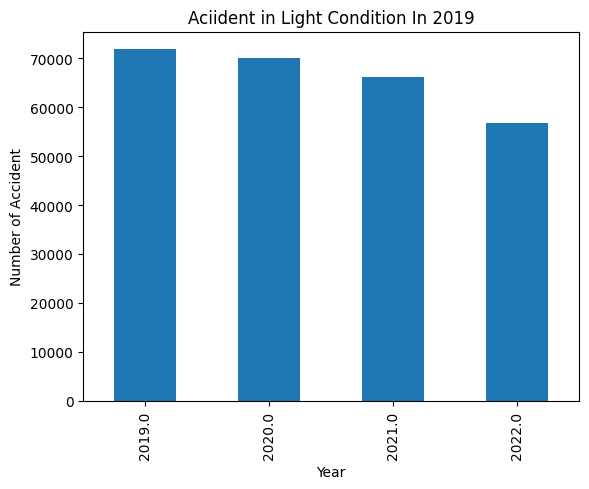

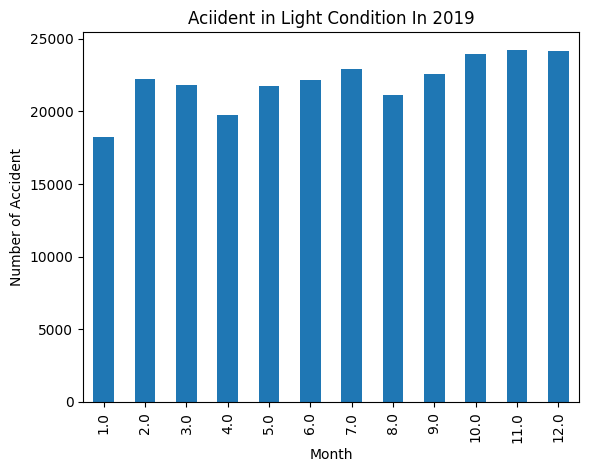

In [41]:
accident_in_light = accident['Year'].value_counts().sort_index()
accident_in_2019 = accident['Month'].value_counts().sort_index()

accident_in_light.plot(kind='bar')
plt.title('Aciident in Light Condition In 2019')
plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.show()

month_names = {
    1:'January', 2:'february', 3:'March', 4:'April', 5:'May',
    6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'december',
}

accident_in_2019.plot(kind='bar')
plt.title('Aciident in Light Condition In 2019')
plt.xlabel('Month')
plt.ylabel('Number of Accident')
plt.show()


In [42]:
df_2020 = accident[accident['Year'] == 2020]

In [43]:
df_2020['Light_Conditions'].value_counts().sum()

np.int64(70163)

In [44]:
df_2020['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       51605
Darkness - lights lit          13467
Darkness - no lighting          4085
Darkness - lighting unknown      717
Darkness - lights unlit          289
Name: count, dtype: int64

<h2>Insight #2</h2>
<h2>There are 73.55% of accident happen on Daylight condition on 2020</h2>

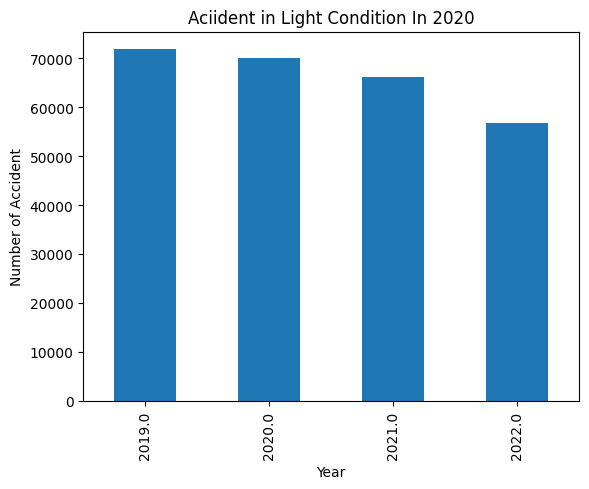

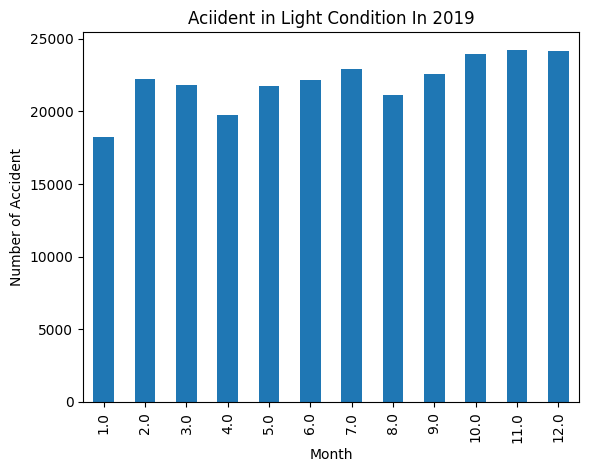

In [45]:
accident_in_light = accident['Year'].value_counts().sort_index()
accident_in_2020 = accident['Month'].value_counts().sort_index()

accident_in_light.plot(kind='bar')
plt.title('Aciident in Light Condition In 2020')
plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.show()

month_names = {
    1:'January', 2:'february', 3:'March', 4:'April', 5:'May',
    6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'december',
}

accident_in_2020.plot(kind='bar')
plt.title('Aciident in Light Condition In 2019')
plt.xlabel('Month')
plt.ylabel('Number of Accident')
plt.show()

In [46]:
df_2021 = accident[accident['Year'] == 2021]

In [47]:
df_2021['Light_Conditions'].value_counts().sum()

np.int64(66172)

In [48]:
df_2021['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       48212
Darkness - lights lit          13298
Darkness - no lighting          3756
Darkness - lighting unknown      643
Darkness - lights unlit          263
Name: count, dtype: int64

<h2>Insight #3</h2>
<h2>There are 73.21% of accident happen on Daylight condition on 2021</h2>

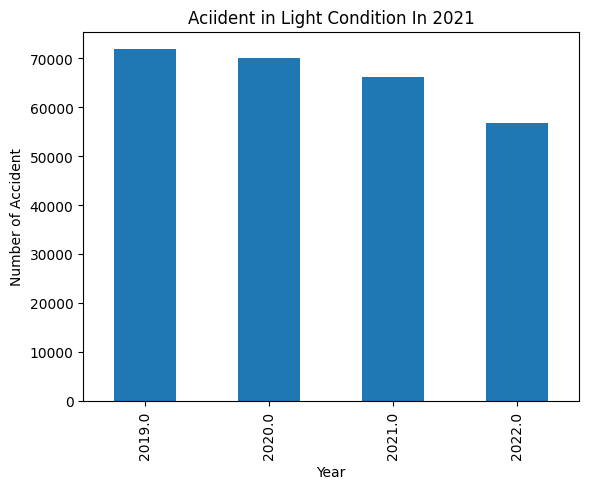

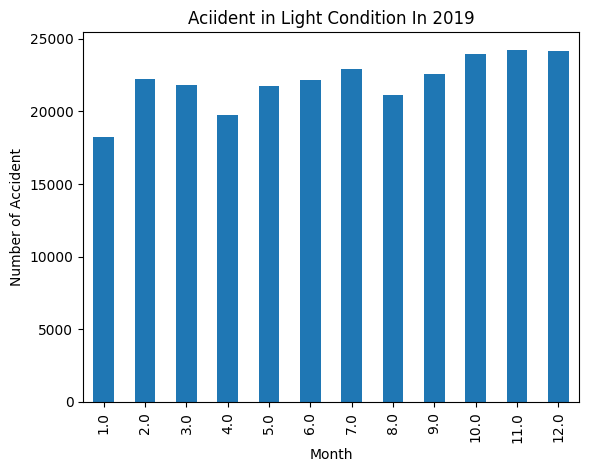

In [49]:
accident_in_light = accident['Year'].value_counts().sort_index()
accident_in_2020 = accident['Month'].value_counts().sort_index()

accident_in_light.plot(kind='bar')
plt.title('Aciident in Light Condition In 2021')
plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.show()

month_names = {
    1:'January', 2:'february', 3:'March', 4:'April', 5:'May',
    6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'december',
}

accident_in_2020.plot(kind='bar')
plt.title('Aciident in Light Condition In 2019')
plt.xlabel('Month')
plt.ylabel('Number of Accident')
plt.show()

In [50]:
df_2022 = accident[accident['Year'] == 2022]

In [51]:
df_2022['Light_Conditions'].value_counts().sum()

np.int64(56805)

In [52]:
df_2022['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       42636
Darkness - lights lit          10653
Darkness - no lighting          2802
Darkness - lighting unknown      511
Darkness - lights unlit          203
Name: count, dtype: int64

<h2>Insight #4</h2>
<h2>There are 73.05% of accident happen on Daylight condition on 2022</h2>

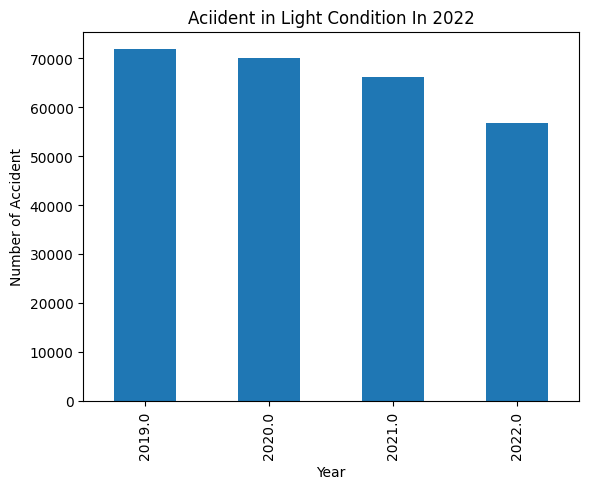

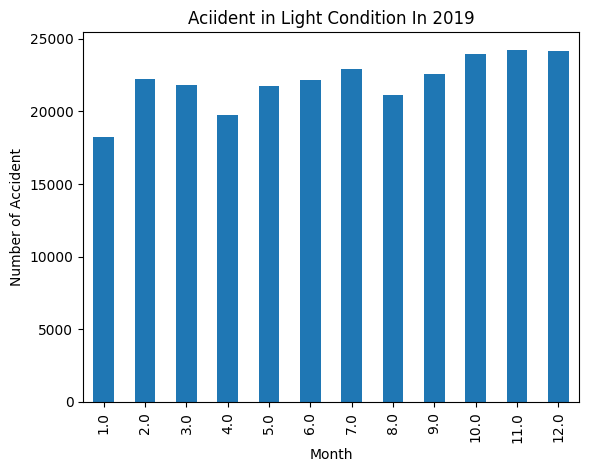

In [53]:
accident_in_light = accident['Year'].value_counts().sort_index()
accident_in_2020 = accident['Month'].value_counts().sort_index()

accident_in_light.plot(kind='bar')
plt.title('Aciident in Light Condition In 2022')
plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.show()

month_names = {
    1:'January', 2:'february', 3:'March', 4:'April', 5:'May',
    6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'december',
}

accident_in_2020.plot(kind='bar')
plt.title('Aciident in Light Condition In 2019')
plt.xlabel('Month')
plt.ylabel('Number of Accident')
plt.show()

<h1>Bivariate</h1>

In [54]:
accident['District Area']

0         Kensington and Chelsea
1         Kensington and Chelsea
2         Kensington and Chelsea
3         Kensington and Chelsea
4         Kensington and Chelsea
                   ...          
660674                  Highland
660675                  Highland
660676                  Highland
660677                  Highland
660678                  Highland
Name: District Area, Length: 660679, dtype: category
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

<h1>How many number of casualties in Kensington and Chelsea in year 2019 to 2022?</h1>

In [55]:
accident[(accident['Year'] == 2019) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      276
Accident_Severity          276
Accident Date              276
Latitude                   276
Light_Conditions           276
District Area              276
Longitude                  276
Number_of_Casualties       276
Number_of_Vehicles         276
Road_Surface_Conditions    276
Road_Type                  276
Urban_or_Rural_Area        276
Weather_Conditions         276
Vehicle_Type               276
Year                       276
Month                      276
Day                        276
DayOfWeek                  276
dtype: int64

In [56]:
dis_year = accident[(accident['Year'] == 2019) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [57]:
dis_year['Number_of_Casualties'].mean()

np.float64(276.0)

In [58]:
accident['Number_of_Casualties'].count().sum()

np.int64(660679)

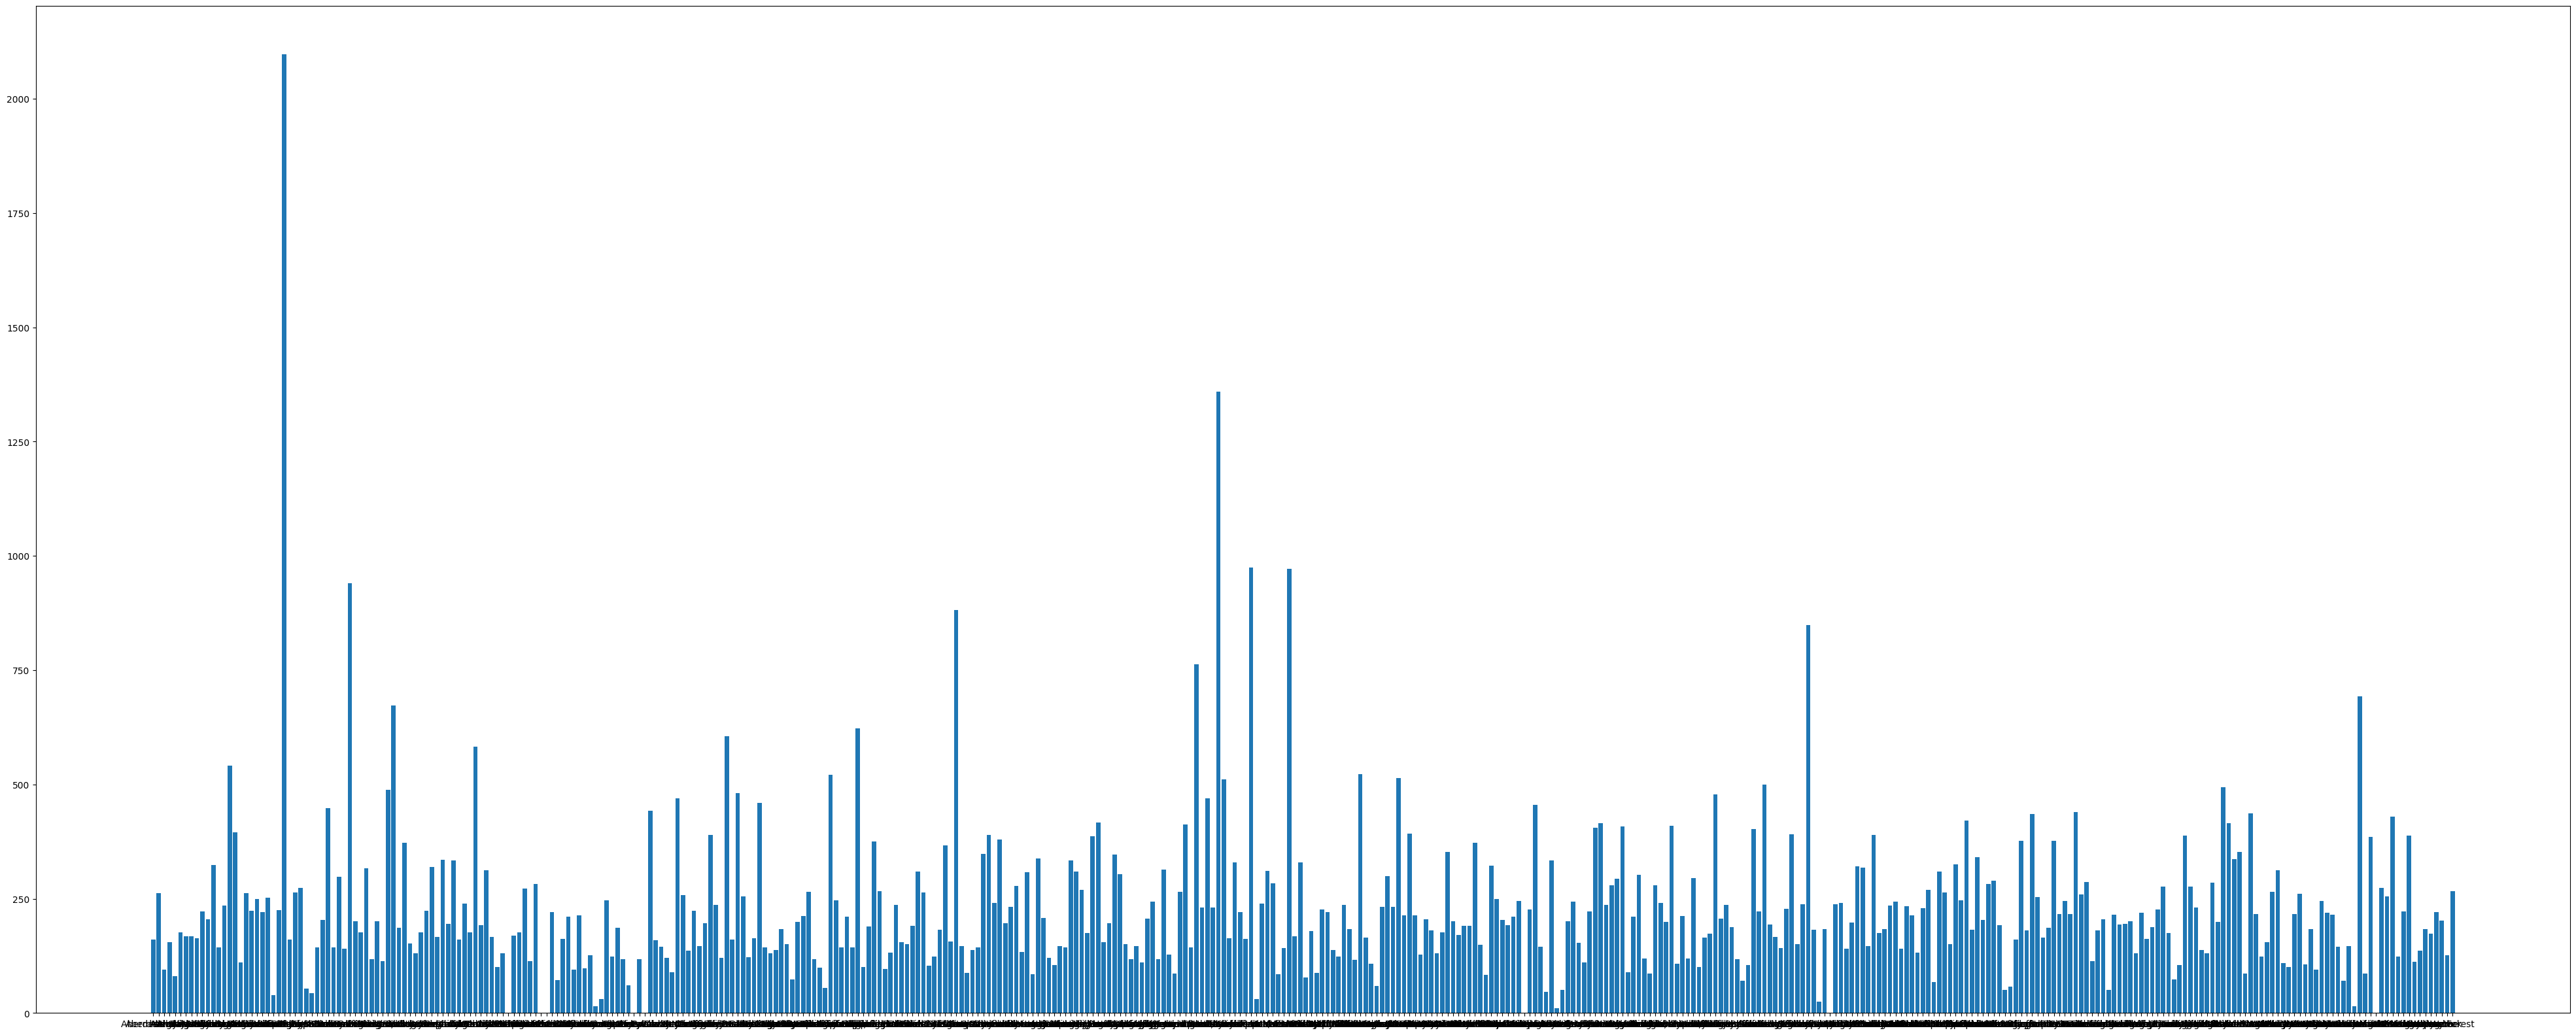

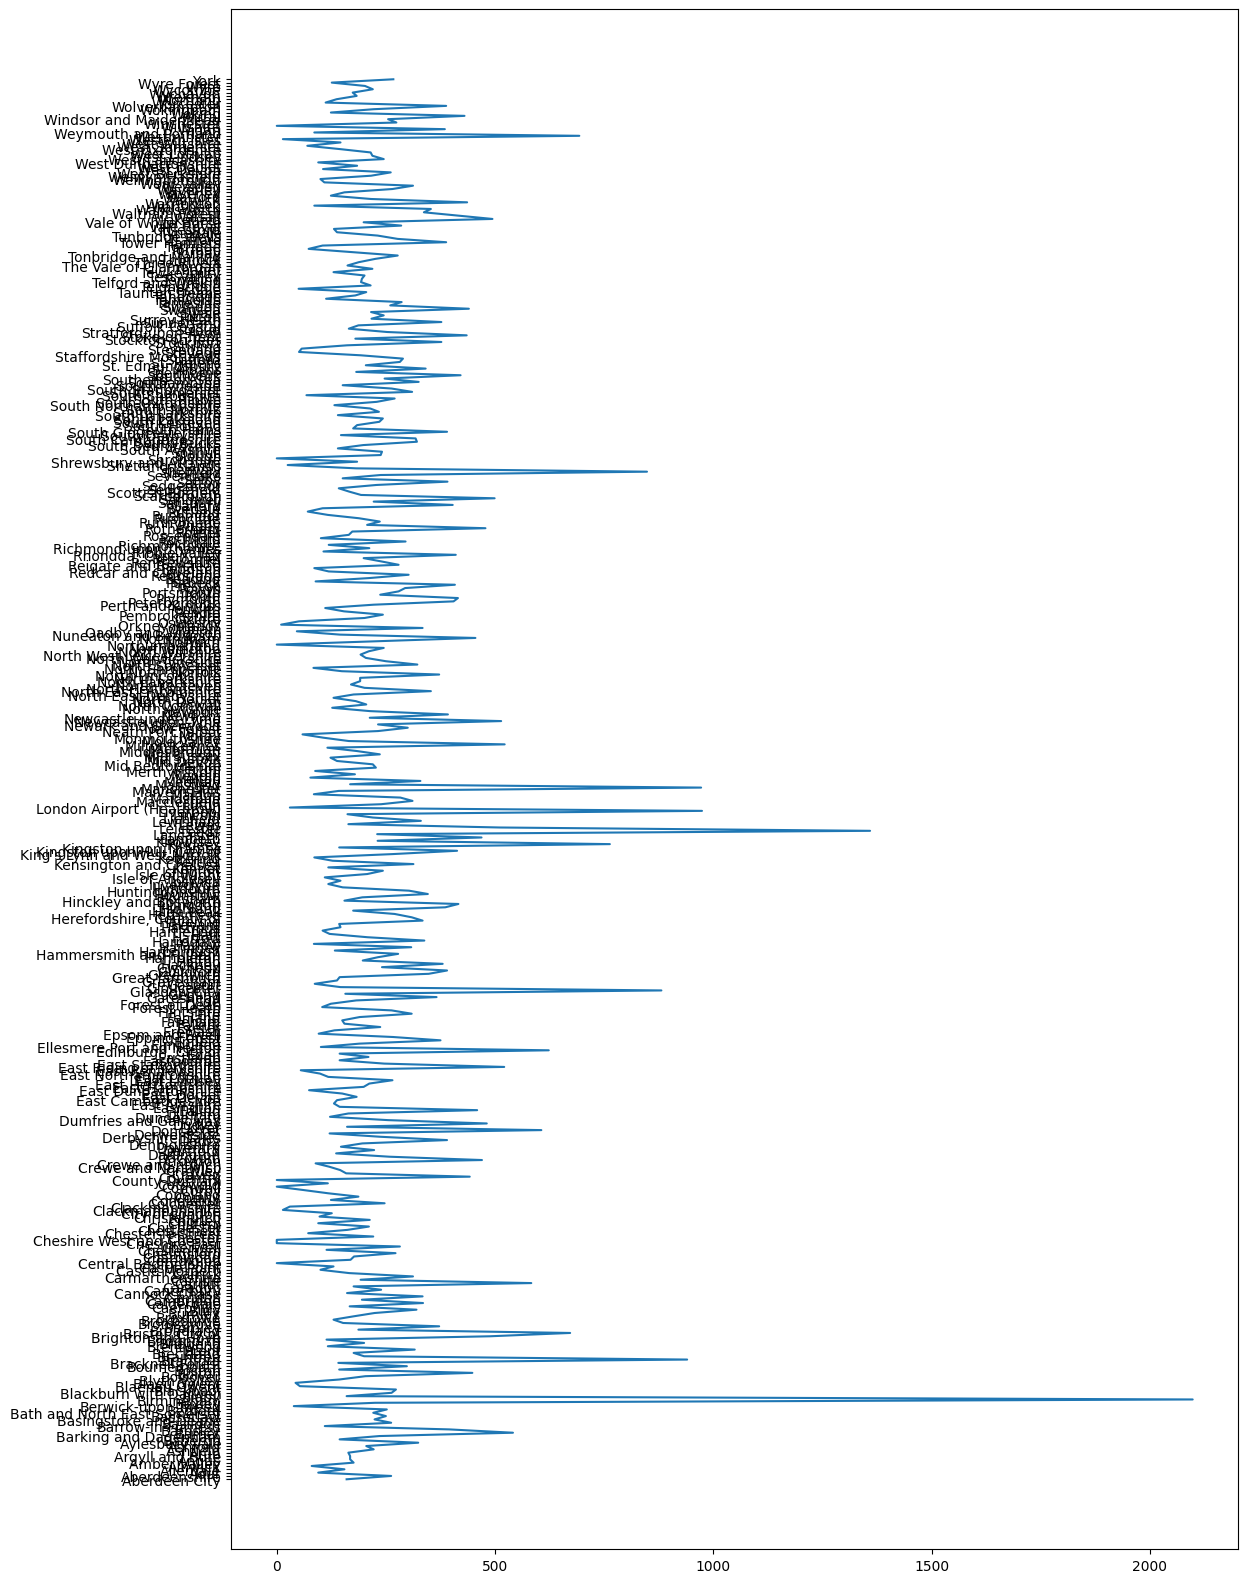

In [59]:
dis_year = accident[accident['Year'] == 2019]

area_year = dis_year.groupby(['District Area'])['Number_of_Casualties'].sum().reset_index()

x = area_year['District Area']
y = area_year['Number_of_Casualties']
plt.bar(x,y)
plt.gcf().set_size_inches(50,20)
plt.show()

plt.plot(y,x)
plt.gcf().set_size_inches(13,20)
plt.show()

In [60]:
area_year

,District Area,Number_of_Casualties
0,Aberdeen City,160
1,Aberdeenshire,262
2,Adur,95
3,Allerdale,155
4,Alnwick,80
...,...,...
417,Wychavon,174
418,Wycombe,220
419,Wyre,202
420,Wyre Forest,126


<h1>Insight #5</h1>
<h2>There are total of 0.29% out of 660679 number of casualties happen in Kensington and Chelsea on 2019</h2>

In [61]:
accident[(accident['Year'] == 2020) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      303
Accident_Severity          303
Accident Date              303
Latitude                   303
Light_Conditions           303
District Area              303
Longitude                  303
Number_of_Casualties       303
Number_of_Vehicles         303
Road_Surface_Conditions    303
Road_Type                  303
Urban_or_Rural_Area        303
Weather_Conditions         303
Vehicle_Type               303
Year                       303
Month                      303
Day                        303
DayOfWeek                  303
dtype: int64

In [62]:
dis_year = accident[(accident['Year'] == 2020) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [63]:
dis_year['Number_of_Casualties'].mean()

np.float64(303.0)

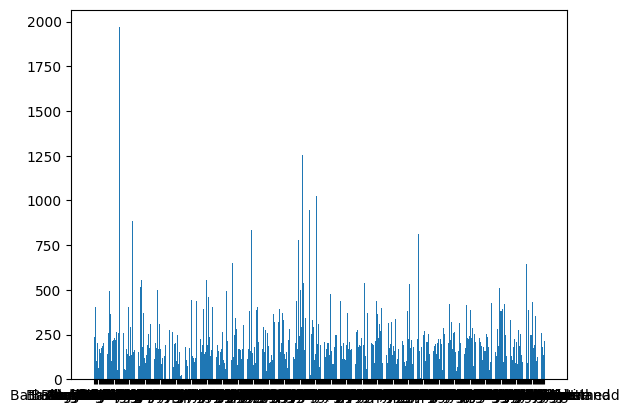

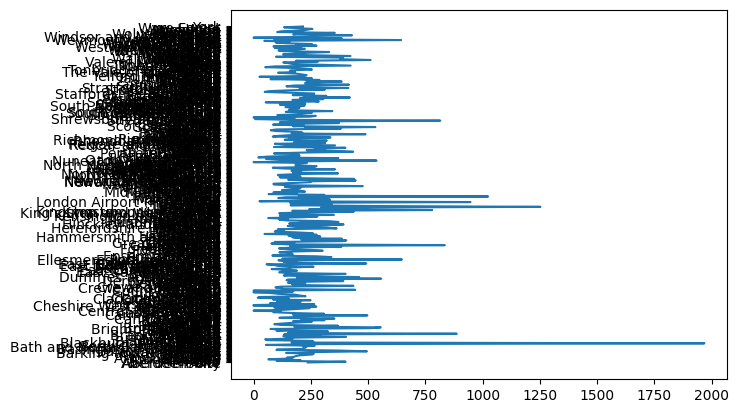

In [64]:
dis_year = accident[accident['Year'] == 2020]

area_year = dis_year.groupby(['District Area'])['Number_of_Casualties'].sum().reset_index()

x = area_year['District Area']
y = area_year['Number_of_Casualties']
plt.bar(x,y)
plt.show()

plt.plot(y,x)
plt.show()

<h1>Insight #6</h1>
<h2>There are total 0.05% out of 660679 number of casualties happen in Kensington and Chelsea on 2020</h2>

In [65]:
accident[(accident['Year'] == 2021) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      273
Accident_Severity          273
Accident Date              273
Latitude                   273
Light_Conditions           273
District Area              273
Longitude                  273
Number_of_Casualties       273
Number_of_Vehicles         273
Road_Surface_Conditions    273
Road_Type                  273
Urban_or_Rural_Area        273
Weather_Conditions         273
Vehicle_Type               273
Year                       273
Month                      273
Day                        273
DayOfWeek                  273
dtype: int64

In [66]:
dis_year = accident[(accident['Year'] == 2021) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [67]:
dis_year['Number_of_Casualties'].mean()

np.float64(273.0)

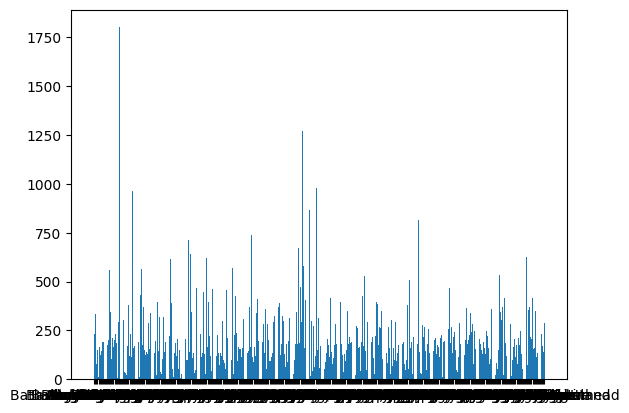

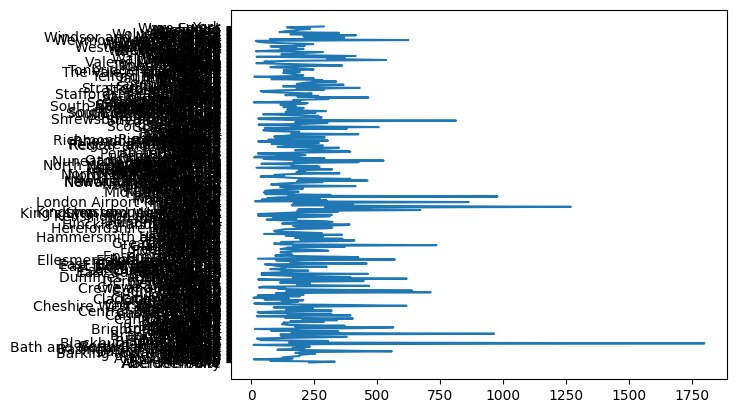

In [68]:
dis_year = accident[accident['Year'] == 2021]

area_year = dis_year.groupby(['District Area'])['Number_of_Casualties'].sum().reset_index()

x = area_year['District Area']
y = area_year['Number_of_Casualties']
plt.bar(x,y)
plt.show()

plt.plot(y,x)
plt.show()

<h1>Insight #7</h1>
<h2>There are total 0.04% out of 660679 number of casualties happen in Kensington and Chelsea on 2021</h2>

In [69]:
accident[(accident['Year'] == 2022) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      278
Accident_Severity          278
Accident Date              278
Latitude                   278
Light_Conditions           278
District Area              278
Longitude                  278
Number_of_Casualties       278
Number_of_Vehicles         278
Road_Surface_Conditions    278
Road_Type                  278
Urban_or_Rural_Area        278
Weather_Conditions         278
Vehicle_Type               278
Year                       278
Month                      278
Day                        278
DayOfWeek                  278
dtype: int64

In [70]:
dis_year = accident[(accident['Year'] == 2022) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [71]:
dis_year['Number_of_Casualties'].mean()

np.float64(278.0)

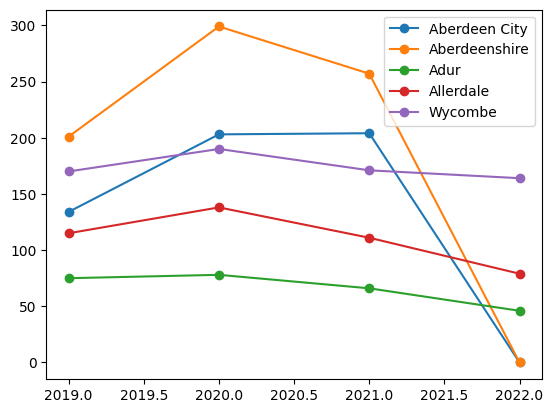

In [72]:
# dis_year = accident[accident['Year'] == 2022]

# area_year = dis_year.groupby(['District Area'])['Number_of_Casualties'].sum().reset_index()

# x = area_year['District Area']
# y = area_year['Number_of_Casualties']
# plt.bar(x,y)
# plt.show()

# plt.plot(y,x)
# plt.show()

year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')

easy_df = year_area.pivot(index='Year', columns='District Area', values='Accident_Count')

plt.plot(easy_df.index, easy_df['Aberdeen City'], label='Aberdeen City', marker='o')
plt.plot(easy_df.index, easy_df['Aberdeenshire'], label='Aberdeenshire', marker='o')
plt.plot(easy_df.index, easy_df['Adur'], label='Adur', marker='o')
plt.plot(easy_df.index, easy_df['Allerdale'], label='Allerdale', marker='o')
plt.plot(easy_df.index, easy_df['Wycombe'], label='Wycombe', marker='o')
plt.legend(loc='upper left', bbox_to_anchor=(0, -1), frameon=True)

plt.legend()
plt.show()

<h1>Insight #8</h1>
<h2>There are total 0.04% out of 660679 number of casualties happen in Kensington and Chelsea on 2022</h2>

<h1>Multivariate</h1>

<h1>How many accidents with accident severity occured in district Kensington and Chelsea in the year 2019?</h1>

In [73]:
accident[(accident['Number_of_Casualties']) & (accident['Year'] == 2019)].count()

Index                      58570
Accident_Severity          58570
Accident Date              58570
Latitude                   58570
Light_Conditions           58570
District Area              58570
Longitude                  58570
Number_of_Casualties       58570
Number_of_Vehicles         58570
Road_Surface_Conditions    58570
Road_Type                  58570
Urban_or_Rural_Area        58570
Weather_Conditions         58570
Vehicle_Type               58570
Year                       58570
Month                      58570
Day                        58570
DayOfWeek                  58570
dtype: int64

In [74]:
accident[((accident['Year'] == 2019) & (accident['Accident_Severity'] == 'Fatal')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      3
Accident_Severity          3
Accident Date              3
Latitude                   3
Light_Conditions           3
District Area              3
Longitude                  3
Number_of_Casualties       3
Number_of_Vehicles         3
Road_Surface_Conditions    3
Road_Type                  3
Urban_or_Rural_Area        3
Weather_Conditions         3
Vehicle_Type               3
Year                       3
Month                      3
Day                        3
DayOfWeek                  3
dtype: int64

In [75]:
acci_area_year = accident[((accident['Year'] == 2019) & (accident['Accident_Severity'] == 'Fatal')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [76]:
acci_area_year['Number_of_Casualties'].mean()

np.float64(3.0)

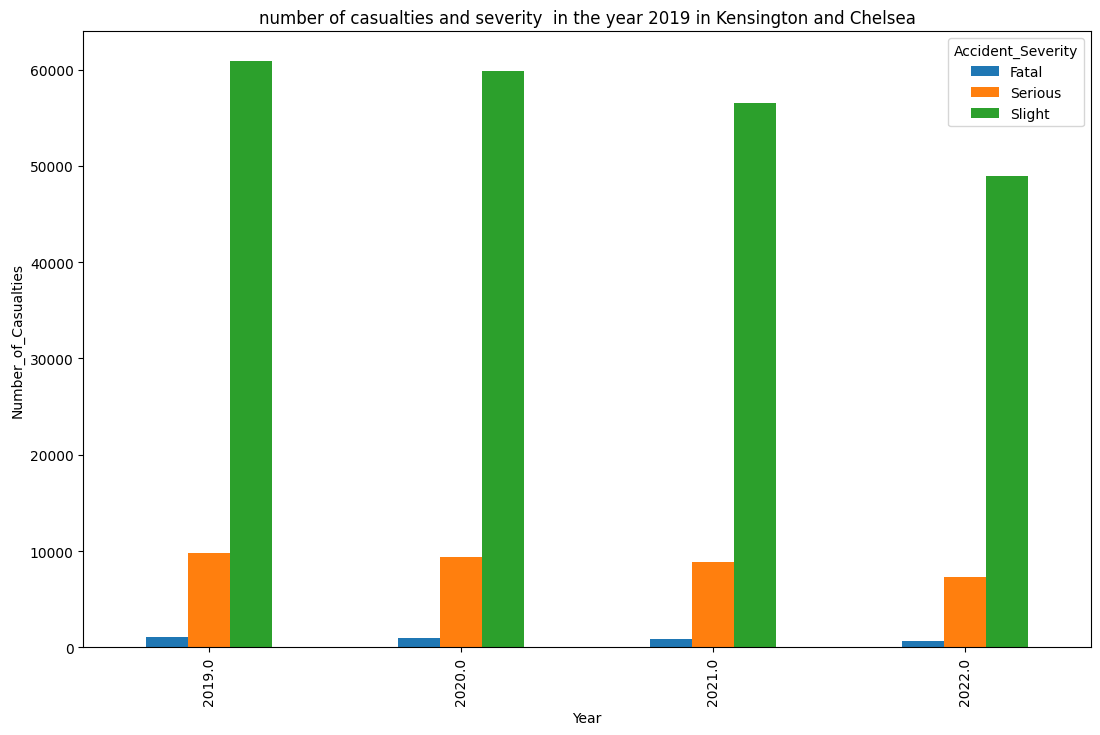

In [77]:
acci_year_sev_dis = accident.groupby(['Year', 'Accident_Severity']).size().unstack()

acci_year_sev_dis.plot(kind='bar', )
plt.title('number of casualties and severity  in the year 2019 in Kensington and Chelsea')
plt.xlabel('Year')
plt.ylabel('Number_of_Casualties')
plt.gcf().set_size_inches(13,8)
plt.show()


<h1>Insight #9</h1>
<h2>There are total 0.0028% Fatal severity out of 381451 number of casualties happen in Kensington and Chelsea on 2019</h2>

In [78]:
accident[((accident['Year'] == 2019) & (accident['Accident_Severity'] == 'Slight')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      223
Accident_Severity          223
Accident Date              223
Latitude                   223
Light_Conditions           223
District Area              223
Longitude                  223
Number_of_Casualties       223
Number_of_Vehicles         223
Road_Surface_Conditions    223
Road_Type                  223
Urban_or_Rural_Area        223
Weather_Conditions         223
Vehicle_Type               223
Year                       223
Month                      223
Day                        223
DayOfWeek                  223
dtype: int64

In [79]:
acci_area_year = accident[((accident['Year'] == 2019) & (accident['Accident_Severity'] == 'Slight')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [80]:
acci_area_year['Number_of_Casualties'].mean()

np.float64(223.0)

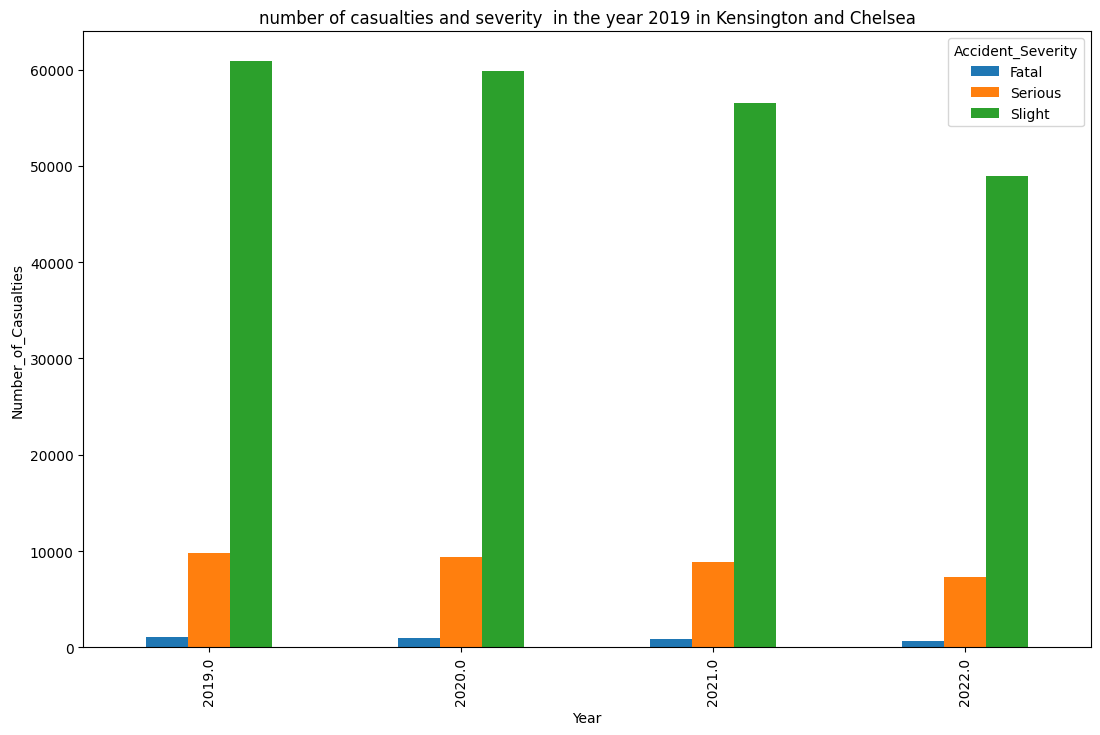

In [81]:
acci_year_sev_dis = accident.groupby(['Year', 'Accident_Severity']).size().unstack()

acci_year_sev_dis.plot(kind='bar', )
plt.title('number of casualties and severity  in the year 2019 in Kensington and Chelsea')
plt.xlabel('Year')
plt.ylabel('Number_of_Casualties')
plt.gcf().set_size_inches(13,8)
plt.show()


<h1>Insight #10</h1>
<h2>There are total 0.44% Slight severity out of 381451 number of casualties happen in Kensington and Chelsea on 2019</h2>

In [82]:
accident[((accident['Year'] == 2019) & (accident['Accident_Severity'] == 'Serious')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      50
Accident_Severity          50
Accident Date              50
Latitude                   50
Light_Conditions           50
District Area              50
Longitude                  50
Number_of_Casualties       50
Number_of_Vehicles         50
Road_Surface_Conditions    50
Road_Type                  50
Urban_or_Rural_Area        50
Weather_Conditions         50
Vehicle_Type               50
Year                       50
Month                      50
Day                        50
DayOfWeek                  50
dtype: int64

In [83]:
acci_area_year = accident[((accident['Year'] == 2019) & (accident['Accident_Severity'] == 'Serious')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [84]:
acci_area_year['Number_of_Casualties'].mean()

np.float64(50.0)

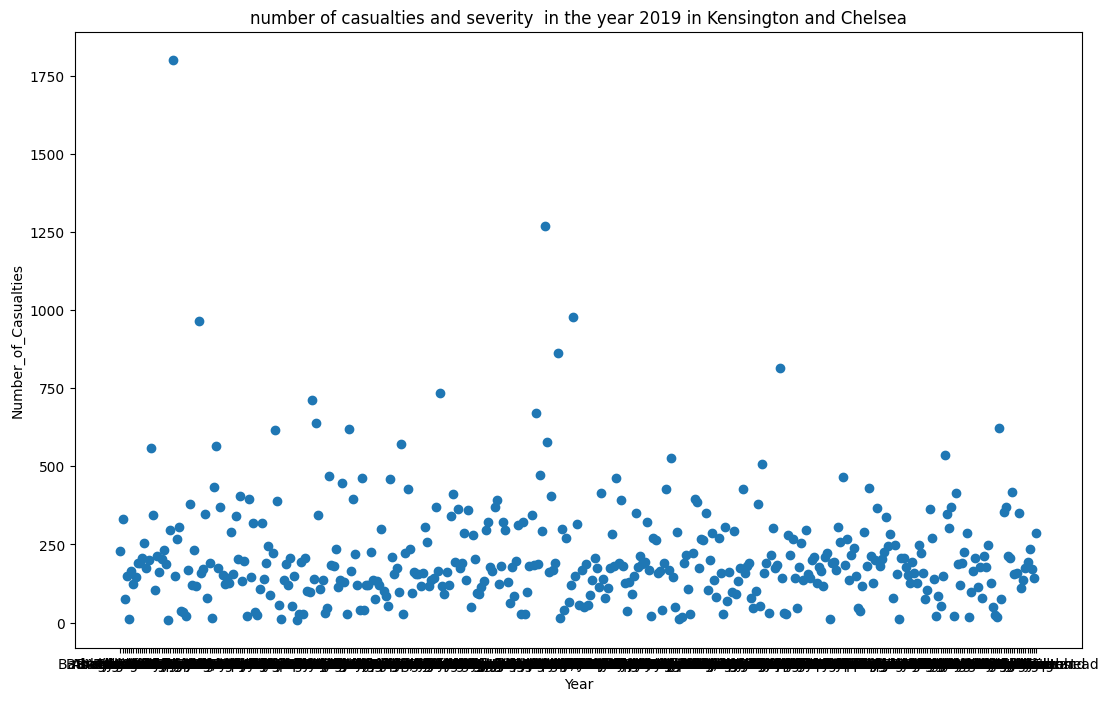

In [85]:
acci_year_sev_dis = accident.groupby(['Year', 'Accident_Severity']).size().unstack()

#acci_year_sev_dis.plot(kind='line', )
plt.title('number of casualties and severity  in the year 2019 in Kensington and Chelsea')
plt.xlabel('Year')
plt.ylabel('Number_of_Casualties')
plt.scatter(x,y)
plt.gcf().set_size_inches(13,8)
plt.show()


<h1>Insight #11</h1>
<h2>There are total 0.06% Slight severity out of 381451 number of casualties happen in Kensington and Chelsea on 2019</h2>

<h1>How many accidents with accident severity occured in district Kensington and Chelsea in the year 2020?</h1>

In [86]:
accident[(accident['Number_of_Casualties']) & (accident['Year'] == 2020)].count()

Index                      57478
Accident_Severity          57478
Accident Date              57478
Latitude                   57478
Light_Conditions           57478
District Area              57478
Longitude                  57478
Number_of_Casualties       57478
Number_of_Vehicles         57478
Road_Surface_Conditions    57478
Road_Type                  57478
Urban_or_Rural_Area        57478
Weather_Conditions         57478
Vehicle_Type               57478
Year                       57478
Month                      57478
Day                        57478
DayOfWeek                  57478
dtype: int64

In [87]:
accident[((accident['Year'] == 2020) & (accident['Accident_Severity'] == 'Fatal')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      3
Accident_Severity          3
Accident Date              3
Latitude                   3
Light_Conditions           3
District Area              3
Longitude                  3
Number_of_Casualties       3
Number_of_Vehicles         3
Road_Surface_Conditions    3
Road_Type                  3
Urban_or_Rural_Area        3
Weather_Conditions         3
Vehicle_Type               3
Year                       3
Month                      3
Day                        3
DayOfWeek                  3
dtype: int64

In [88]:
acci_area_year = accident[((accident['Year'] == 2020) & (accident['Accident_Severity'] == 'Fatal')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [89]:
acci_area_year['Number_of_Casualties'].mean()

np.float64(3.0)

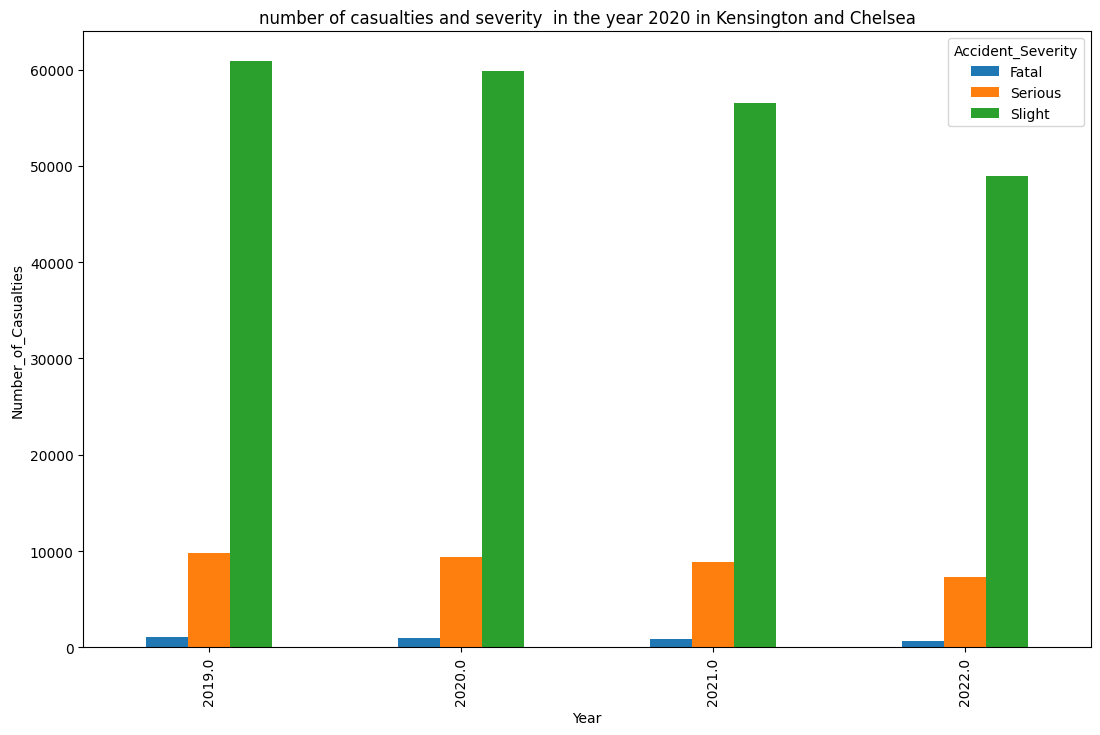

In [90]:
acci_year_sev_dis = accident.groupby(['Year', 'Accident_Severity']).size().unstack()

acci_year_sev_dis.plot(kind='bar', )
plt.title('number of casualties and severity  in the year 2020 in Kensington and Chelsea')
plt.xlabel('Year') == '2019'
plt.ylabel('Number_of_Casualties')
plt.gcf().set_size_inches(13,8)
plt.show()

<h1>Insight #11</h1>
<h2>There are total 0.0052% Fatal severity out of 57478 number of casualties happen in Kensington and Chelsea on 2020</h2>

In [91]:
accident[((accident['Year'] == 2020) & (accident['Accident_Severity'] == 'Slight')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      252
Accident_Severity          252
Accident Date              252
Latitude                   252
Light_Conditions           252
District Area              252
Longitude                  252
Number_of_Casualties       252
Number_of_Vehicles         252
Road_Surface_Conditions    252
Road_Type                  252
Urban_or_Rural_Area        252
Weather_Conditions         252
Vehicle_Type               252
Year                       252
Month                      252
Day                        252
DayOfWeek                  252
dtype: int64

In [92]:
acci_area_year = accident[((accident['Year'] == 2020) & (accident['Accident_Severity'] == 'Slight')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [93]:
acci_area_year['Number_of_Casualties'].mean()

np.float64(252.0)

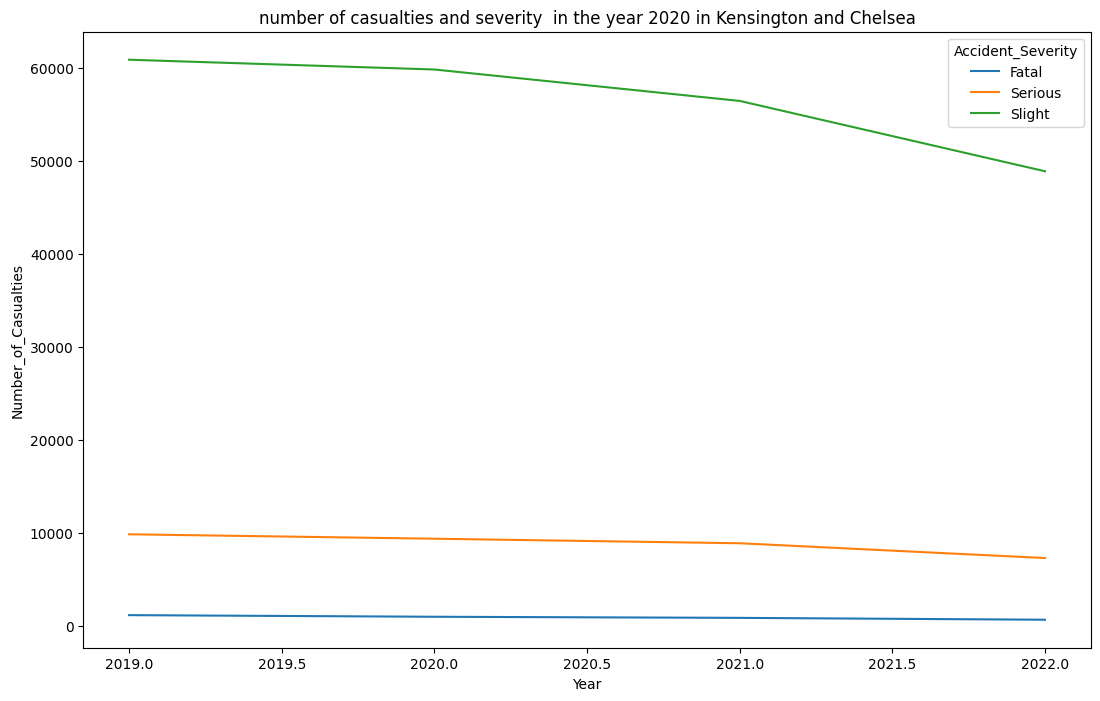

In [94]:
acci_year_sev_dis = accident.groupby(['Year', 'Accident_Severity']).size().unstack()

acci_year_sev_dis.plot(kind='line', )
plt.title('number of casualties and severity  in the year 2020 in Kensington and Chelsea')
plt.xlabel('Year')
plt.ylabel('Number_of_Casualties')
plt.gcf().set_size_inches(13,8)
plt.show()

<h1>Insight #12</h1>
<h2>There are total 0.44% Slight severity out of 57478 number of casualties happen in Kensington and Chelsea on 2020</h2>

In [95]:
accident[((accident['Year'] == 2020) & (accident['Accident_Severity'] == 'Serious')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      48
Accident_Severity          48
Accident Date              48
Latitude                   48
Light_Conditions           48
District Area              48
Longitude                  48
Number_of_Casualties       48
Number_of_Vehicles         48
Road_Surface_Conditions    48
Road_Type                  48
Urban_or_Rural_Area        48
Weather_Conditions         48
Vehicle_Type               48
Year                       48
Month                      48
Day                        48
DayOfWeek                  48
dtype: int64

In [96]:
acci_area_year = accident[((accident['Year'] == 2020) & (accident['Accident_Severity'] == 'Serious')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [97]:
acci_area_year['Number_of_Casualties'].mean()

np.float64(48.0)

<h1>Insight #13</h1>
<h2>There are total 0.08% Serious severity out of 57478 number of casualties happen in Kensington and Chelsea on 2020</h2>

<h1>How many accidents with accident severity occured in district Kensington and Chelsea in the year 2021?</h1>

In [98]:
accident[(accident['Number_of_Casualties']) & (accident['Year'] == 2021)].count()

Index                      54220
Accident_Severity          54220
Accident Date              54220
Latitude                   54220
Light_Conditions           54220
District Area              54220
Longitude                  54220
Number_of_Casualties       54220
Number_of_Vehicles         54220
Road_Surface_Conditions    54220
Road_Type                  54220
Urban_or_Rural_Area        54220
Weather_Conditions         54220
Vehicle_Type               54220
Year                       54220
Month                      54220
Day                        54220
DayOfWeek                  54220
dtype: int64

In [99]:
accident[((accident['Year'] == 2021) & (accident['Accident_Severity'] == 'Fatal')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      2
Accident_Severity          2
Accident Date              2
Latitude                   2
Light_Conditions           2
District Area              2
Longitude                  2
Number_of_Casualties       2
Number_of_Vehicles         2
Road_Surface_Conditions    2
Road_Type                  2
Urban_or_Rural_Area        2
Weather_Conditions         2
Vehicle_Type               2
Year                       2
Month                      2
Day                        2
DayOfWeek                  2
dtype: int64

In [100]:
acci_area_year = accident[((accident['Year'] == 2021) & (accident['Accident_Severity'] == 'Fatal')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [101]:
acci_area_year['Number_of_Casualties'].mean()

np.float64(2.0)

<h1>Insight #14</h1>
<h2>There are total 0.0037% Fatal severity out of 54220 number of casualties happen in Kensington and Chelsea on 2021</h2>

In [102]:
accident[((accident['Year'] == 2021) & (accident['Accident_Severity'] == 'Slight')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      232
Accident_Severity          232
Accident Date              232
Latitude                   232
Light_Conditions           232
District Area              232
Longitude                  232
Number_of_Casualties       232
Number_of_Vehicles         232
Road_Surface_Conditions    232
Road_Type                  232
Urban_or_Rural_Area        232
Weather_Conditions         232
Vehicle_Type               232
Year                       232
Month                      232
Day                        232
DayOfWeek                  232
dtype: int64

In [103]:
acci_area_year = accident[((accident['Year'] == 2021) & (accident['Accident_Severity'] == 'Slight')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [104]:
acci_area_year['Number_of_Casualties'].mean()

np.float64(232.0)

<h1>Insight #15</h1>
<h2>There are total 0.43% Slight severity out of 54220 number of casualties happen in Kensington and Chelsea on 2021</h2>

In [105]:
accident[((accident['Year'] == 2021) & (accident['Accident_Severity'] == 'Serious')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

Index                      39
Accident_Severity          39
Accident Date              39
Latitude                   39
Light_Conditions           39
District Area              39
Longitude                  39
Number_of_Casualties       39
Number_of_Vehicles         39
Road_Surface_Conditions    39
Road_Type                  39
Urban_or_Rural_Area        39
Weather_Conditions         39
Vehicle_Type               39
Year                       39
Month                      39
Day                        39
DayOfWeek                  39
dtype: int64

In [106]:
acci_area_year = accident[((accident['Year'] == 2021) & (accident['Accident_Severity'] == 'Serious')) & (accident['District Area'] == 'Kensington and Chelsea')].count()

In [107]:
acci_area_year['Number_of_Casualties'].mean()

np.float64(39.0)

<h1>Insight #16</h1>
<h2>There are total 0.07% Serious severity out of 54220 number of casualties happen in Kensington and Chelsea on 2021</h2>

<h1>How do light conditions, number of casualties, and vehicle type influence the distribution of accidents in urban and rural areas?

Possible Insight:</h1>

In [108]:
print(accident.columns)


Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')


In [109]:
wehther_ve = np.round(accident.groupby(['Light_Conditions', 'Number_of_Casualties', 'Vehicle_Type'])['Urban_or_Rural_Area'].size(), 1)

In [110]:
wehther_ve

Light_Conditions             Number_of_Casualties  Vehicle_Type                        
Darkness - lighting unknown  1                     Agricultural vehicle                      13
                                                   Bus or coach (17 or more pass seats)     219
                                                   Car                                     3897
                                                   Data missing or out of range               0
                                                   Goods 7.5 tonnes mgw and over            147
                                                                                           ... 
Daylight                     68                    Other vehicle                              0
                                                   Pedal cycle                                0
                                                   Ridden horse                               0
                                                

In [111]:
wehther_ve.unstack()

Vehicle_Type                                      Agricultural vehicle  \
Light_Conditions            Number_of_Casualties                         
Darkness - lighting unknown 1                                       13   
                            2                                        2   
                            3                                        2   
                            4                                        2   
                            5                                        0   
...                                                                ...   
Daylight                    45                                       0   
                            47                                       0   
                            48                                       0   
                            62                                       0   
                            68                                       0   

Vehicle_Type                                      Bus or coach (17 or more pass seats)  \
Light_Conditions            Number_of_Casualties                                         
Darkness - lighting unknown 1                                                      219   
                            2                                                       31   
                            3                                                       10   
                            4                                                        4   
                            5                                                        3   
...                                                                                ...   
Daylight                    45                                                       0   
                            47                                                       0   
                            48                                                       0   
                            62                                                       1   
                            68                                                       0   

Vehicle_Type                                       Car  \
Light_Conditions            Number_of_Casualties         
Darkness - lighting unknown 1                     3897   
                            2                      716   
                            3                      185   
                            4                       80   
                            5                       21   
...                                                ...   
Daylight                    45                       1   
                            47                       1   
                            48                       0   
                            62                       0   
                            68                       0   

Vehicle_Type                                      Data missing or out of range  \
Light_Conditions            Number_of_Casualties                                 
Darkness - lighting unknown 1                                                0   
                            2                                                0   
                            3                                                0   
                            4                                                0   
                            5                                                0   
...                                                                        ...   
Daylight                    45                                               0   
                            47                                               0   
                            48                                               0   
                            62                                               0   
                            68                                               0   

Vehicle_Type                                

<h1>Insight #17</h1>
<h2>If accidents involving a specific vehicle type (e.g., motorcycles) occur more frequently in rural areas under poor light conditions, this may indicate a need for better road lighting and visibility measures. Conversely, a higher number of casualties in urban areas under good light conditions might suggest that factors like traffic congestion or pedestrian density contribute more to accident severity.</h2>

<h1>How do light conditions, number of casualties, and road type influence the distribution of accidents in urban and rural areas?</h1>

In [112]:
wehther_ve = np.round(accident.groupby(['Light_Conditions', 'Number_of_Casualties', 'Road_Type'])['Urban_or_Rural_Area'].size(), 1)

In [113]:
wehther_ve.unstack()

Road_Type                                         Dual carriageway  \
Light_Conditions            Number_of_Casualties                     
Darkness - lighting unknown 1                                  684   
                            2                                  143   
                            3                                   44   
                            4                                   22   
                            5                                    5   
...                                                            ...   
Daylight                    45                                   1   
                            47                                   1   
                            48                                   0   
                            62                                   0   
                            68                                   0   

Road_Type                                         One way street  Roundabout  \
Light_Conditions            Number_of_Casualties                               
Darkness - lighting unknown 1                                104         378   
                            2                                 17          70   
                            3                                  2          17   
                            4                                  1           4   
                            5                                  0           1   
...                                                          ...         ...   
Daylight                    45                                 0           0   
                            47                                 0           0   
                            48                                 0           0   
                            62                                 0           0   
                            68                                 0           0   

Road_Type                                         Single carriageway  \
Light_Conditions            Number_of_Casualties                       
Darkness - lighting unknown 1                                   3707   
                            2                                    680   
                            3                                    178   
                            4                                     68   
                            5                                     22   
...                                                              ...   
Daylight                    45                                     0   
                            47                                     0   
                            48                                     0   
                            62                                     1   
                            68                                     0   

Road_Type                                         Slip road  unknown  
Light_Conditions            Number_of_Casualties                      
Darkness - lighting unknown 1                            64      188  
                            2                            16       30  
                            3                             4        6  
                            4                             2        7  
                            5                             0        3  
...                                                     ...      ...  
Daylight                    45                            0        0  
                            47                            0        0  
                            48                            0        0  
                            62                            0        0  
                            68                            0        0  

[180 rows x 6 columns]

<h1>Insight #18</h1>
<h2>If accidents on high-speed roads (e.g., motorways) occur more frequently in rural areas under poor light conditions, it may indicate a need for better nighttime visibility measures, such as improved road lighting or reflective markings. On the other hand, a higher number of casualties on urban roads under good light conditions might suggest that factors like heavy traffic flow, intersections, or pedestrian activity play a significant role in accident severity.</h2>

<h1>How do light conditions, number of casualties, and weather conditions influence the distribution of accidents in urban and rural areas?</h1>

In [114]:
wehther_ve = np.round(accident.groupby(['Light_Conditions', 'Number_of_Casualties', 'Weather_Conditions'])['Urban_or_Rural_Area'].size(), 1)

In [115]:
wehther_ve.unstack()

Weather_Conditions                                Fine + high winds  \
Light_Conditions            Number_of_Casualties                      
Darkness - lighting unknown 1                                    43   
                            2                                    10   
                            3                                     5   
                            4                                     1   
                            5                                     0   
...                                                             ...   
Daylight                    45                                    0   
                            47                                    0   
                            48                                    0   
                            62                                    0   
                            68                                    0   

Weather_Conditions                                Fine no high winds  \
Light_Conditions            Number_of_Casualties                       
Darkness - lighting unknown 1                                   2862   
                            2                                    566   
                            3                                    156   
                            4                                     70   
                            5                                     18   
...                                                              ...   
Daylight                    45                                     1   
                            47                                     0   
                            48                                     0   
                            62                                     1   
                            68                                     0   

Weather_Conditions                                Fog or mist  Other  \
Light_Conditions            Number_of_Casualties                       
Darkness - lighting unknown 1                              48    151   
                            2                              12     25   
                            3                               3      8   
                            4                               2      1   
                            5                               0      1   
...                                                       ...    ...   
Daylight                    45                              0      0   
                            47                              0      0   
                            48                              0      0   
                            62                              0      0   
                            68                              0      0   

Weather_Conditions                                Raining + high winds  \
Light_Conditions            Number_of_Casualties                         
Darkness - lighting unknown 1                                       82   
                            2                                       26   
                            3                                        2   
                            4                                        0   
                            5                                        0   
...                                                                ...   
Daylight                    45                                       0   
                            47                                       0   
                            48                                       0   
                            62                                       0   
                            68                                       0   

Weather_Conditions                                Raining no high winds  \
Light_Conditions            Number_of_Casualties                          
Darkness - lighting unknown 1                                       498   
              

<h1>Insight #19</h1>
<h2>If accidents occur more frequently in rural areas during poor weather conditions (e.g., heavy rain or fog) and low-light conditions, this may suggest that reduced visibility and slippery roads contribute significantly to accident rates. Conversely, a high number of casualties in urban areas under clear weather and good lighting might indicate that factors like traffic congestion, driver behavior, or pedestrian interactions play a more critical role in accident severity.</h2>

<h1>How do light conditions, number of casualties, and district area influence the distribution of accidents in urban and rural areas?</h1>

In [116]:
wehther_ve = np.round(accident.groupby(['Light_Conditions', 'Number_of_Casualties', 'District Area'])['Urban_or_Rural_Area'].size(), 1)

In [117]:
wehther_ve.unstack()

District Area                                     Aberdeen City  \
Light_Conditions            Number_of_Casualties                  
Darkness - lighting unknown 1                                 8   
                            2                                 0   
                            3                                 0   
                            4                                 0   
                            5                                 0   
...                                                         ...   
Daylight                    45                                0   
                            47                                0   
                            48                                0   
                            62                                0   
                            68                                0   

District Area                                     Aberdeenshire  Adur  \
Light_Conditions            Number_of_Casualties                        
Darkness - lighting unknown 1                                 3     3   
                            2                                 0     1   
                            3                                 0     0   
                            4                                 0     0   
                            5                                 0     0   
...                                                         ...   ...   
Daylight                    45                                0     0   
                            47                                0     0   
                            48                                0     0   
                            62                                0     0   
                            68                                0     0   

District Area                                     Allerdale  Alnwick  \
Light_Conditions            Number_of_Casualties                       
Darkness - lighting unknown 1                             6        1   
                            2                             0        0   
                            3                             0        0   
                            4                             0        0   
                            5                             0        0   
...                                                     ...      ...   
Daylight                    45                            0        0   
                            47                            0        0   
                            48                            0        0   
                            62                            0        0   
                            68                            0        0   

District Area                                     Amber Valley  Angus  \
Light_Conditions            Number_of_Casualties                        
Darkness - lighting unknown 1                               25      2   
                            2                                2      0   
                            3                                1      0   
                            4                                1      0   
                            5                                0      0   
...                                                        ...    ...   
Daylight                    45                               0      0   
                            47                               0      0   
                            48                               0      0   
                            62                               0      0   
                            68                               0      0   

District Area                                     Argyll and Bute  Arun  \
Light_Conditions            Number_of_Casualties                          
Darkness - lighting unknown 1                                   0    12   
                            2                                   1 

<h1>Insight #20</h1>
<h2>If certain district areas experience more accidents in rural settings under poor light conditions, this may highlight regional infrastructure issues such as inadequate street lighting or poorly maintained roads. On the other hand, a high number of casualties in urban district areas with good lighting might indicate that high population density, busy intersections, or traffic flow patterns contribute more to accident severity.</h2>

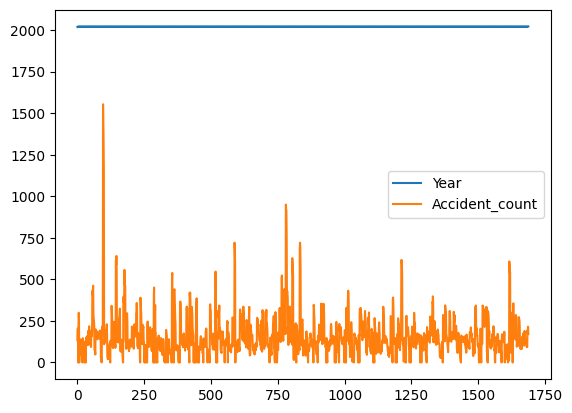

In [118]:
year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_count')

year_area.plot(kind='line')

plt.show()